In [265]:
import pandas as pd

# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv(r"D:\ML project\data\3.dofd07_05_0101_03_marine_2565 (1).csv")

ตรวจสอบข้อมูลเบื้องต้น

In [266]:
print(df.shape)

(15886, 9)


In [267]:
print(df.columns)

Index(['ปี', 'เดือน', 'ประเภทการทำการประมง', 'เครื่องมือ', 'ขนาดเรือ',
       'พื้นที่ทำการประมง', 'ชนิดสัตว์น้ำ', 'ปริมาณ', 'มูลค่า'],
      dtype='object')


In [268]:
print(df.dtypes)

ปี                      int64
เดือน                  object
ประเภทการทำการประมง    object
เครื่องมือ             object
ขนาดเรือ               object
พื้นที่ทำการประมง      object
ชนิดสัตว์น้ำ           object
ปริมาณ                 object
มูลค่า                 object
dtype: object


In [269]:
print(df.isnull().sum())

ปี                     0
เดือน                  0
ประเภทการทำการประมง    0
เครื่องมือ             0
ขนาดเรือ               0
พื้นที่ทำการประมง      0
ชนิดสัตว์น้ำ           0
ปริมาณ                 0
มูลค่า                 0
dtype: int64


In [270]:
print(df.head())

     ปี   เดือน ประเภทการทำการประมง       เครื่องมือ  \
0  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
1  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
2  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
3  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
4  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   

                    ขนาดเรือ พื้นที่ทำการประมง  ชนิดสัตว์น้ำ ปริมาณ    มูลค่า  
0  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน      ปลาทูแขก  47.00  1,431.00  
1  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน  ปลาสีกุนตาโต  15.00    704.00  
2  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน  ปลาน้ำดอกไม้  55.00  3,306.00  
3  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน    ปลาทรายแดง  43.00  1,743.00  
4  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน      ปลาปากคม  57.00  1,775.00  


In [271]:
print(df.describe())

            ปี
count  15886.0
mean    2565.0
std        0.0
min     2565.0
25%     2565.0
50%     2565.0
75%     2565.0
max     2565.0


ไม่มี missing value

Clean Data

In [272]:
# ลบ comma ในคอลัมน์ 'ปริมาณ' และ 'มูลค่า' แล้วแปลงเป็น float
df['ปริมาณ'] = df['ปริมาณ'].astype(str).str.replace(",", "").astype(float)
df['มูลค่า'] = df['มูลค่า'].astype(str).str.replace(",", "").astype(float)

# ลบ missing values (ถ้ามี)
df = df.dropna()

# ตรวจสอบและกรองค่าผิดปกติ เช่น ค่าติดลบ
df = df[(df['ปริมาณ'] >= 0) & (df['มูลค่า'] >= 0)]

print(df.head())

     ปี   เดือน ประเภทการทำการประมง       เครื่องมือ  \
0  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
1  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
2  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
3  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   
4  2565  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่   

                    ขนาดเรือ พื้นที่ทำการประมง  ชนิดสัตว์น้ำ  ปริมาณ  มูลค่า  
0  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน      ปลาทูแขก    47.0  1431.0  
1  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน  ปลาสีกุนตาโต    15.0   704.0  
2  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน  ปลาน้ำดอกไม้    55.0  3306.0  
3  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน    ปลาทรายแดง    43.0  1743.0  
4  ตั้งแต่ 150 ตันกรอสขึ้นไป          อันดามัน      ปลาปากคม    57.0  1775.0  


Categorical Encoding

Label Encoding เดือน

In [273]:
import sklearn as sk

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
df['เดือน'].unique()

array(['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน',
       'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม'],
      dtype=object)

In [276]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [277]:
month_map = {
    'มกราคม': 1, 'กุมภาพันธ์': 2, 'มีนาคม': 3, 'เมษายน': 4,
    'พฤษภาคม': 5, 'มิถุนายน': 6, 'กรกฎาคม': 7, 'สิงหาคม': 8,
    'กันยายน': 9, 'ตุลาคม': 10, 'พฤศจิกายน': 11, 'ธันวาคม': 12
}
df['เดือน'] = df['เดือน'].map(month_map)

In [278]:
le = LabelEncoder()
df['เดือน_encoded'] = le.fit_transform(df['เดือน'])

In [279]:
le = LabelEncoder()
df['เดือน_encoded'] = le.fit_transform(df['เดือน'])

In [280]:
print(df[['เดือน', 'เดือน_encoded']].head(12))

    เดือน  เดือน_encoded
0       1              0
1       1              0
2       1              0
3       1              0
4       1              0
5       1              0
6       1              0
7       1              0
8       1              0
9       1              0
10      1              0
11      1              0


In [281]:
df['เดือน'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Label Encoding พื้นที่ทำการประมง

In [282]:
print(df['พื้นที่ทำการประมง'].unique())

['อันดามัน' 'อ่าวไทย']


In [283]:
le = LabelEncoder()
df['พื้นที่ทำการประมง_label'] = le.fit_transform(df['พื้นที่ทำการประมง'])

In [284]:
print(df[['พื้นที่ทำการประมง', 'พื้นที่ทำการประมง_label']].head())

  พื้นที่ทำการประมง  พื้นที่ทำการประมง_label
0          อันดามัน                        0
1          อันดามัน                        0
2          อันดามัน                        0
3          อันดามัน                        0
4          อันดามัน                        0


อันดามัน = 0, อ่าวไทย = 1

In [285]:
df.head()

,ปี,เดือน,ประเภทการทำการประมง,เครื่องมือ,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label
0,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาทูแขก,47.0,1431.0,0,0
1,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาสีกุนตาโต,15.0,704.0,0,0
2,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาน้ำดอกไม้,55.0,3306.0,0,0
3,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาทรายแดง,43.0,1743.0,0,0
4,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาปากคม,57.0,1775.0,0,0


Label Encoding ประเภทการทำการประมง

In [286]:
print(df['ประเภทการทำการประมง'].unique())

['พาณิชย์' 'พื้นบ้าน']


In [287]:
le = LabelEncoder()
df['ประเภทการทำการประมง_label'] = le.fit_transform(df['ประเภทการทำการประมง'])

In [288]:
print(df[['ประเภทการทำการประมง', 'ประเภทการทำการประมง_label']].head())

  ประเภทการทำการประมง  ประเภทการทำการประมง_label
0             พาณิชย์                          0
1             พาณิชย์                          0
2             พาณิชย์                          0
3             พาณิชย์                          0
4             พาณิชย์                          0


พาณิชย์ → 0 ,
พื้นบ้าน → 1

In [289]:
df.head()

,ปี,เดือน,ประเภทการทำการประมง,เครื่องมือ,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label
0,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาทูแขก,47.0,1431.0,0,0,0
1,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาสีกุนตาโต,15.0,704.0,0,0,0
2,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0
3,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาทรายแดง,43.0,1743.0,0,0,0
4,2565,1,พาณิชย์,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,อันดามัน,ปลาปากคม,57.0,1775.0,0,0,0


In [290]:
# ลบคอลัมน์ 'เดือน' และ 'ประเภทการทำการประมง'
df = df.drop(columns=['เดือน', 'พื้นที่ทำการประมง', 'ประเภทการทำการประมง'])

one hot ขนาดเรือ

In [291]:
# ตรวจสอบผลลัพธ์
df.head()

,ปี,เครื่องมือ,ขนาดเรือ,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label
0,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาทูแขก,47.0,1431.0,0,0,0
1,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาสีกุนตาโต,15.0,704.0,0,0,0
2,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0
3,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาทรายแดง,43.0,1743.0,0,0,0
4,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาปากคม,57.0,1775.0,0,0,0


In [292]:
print(df['ขนาดเรือ'].unique())

['ตั้งแต่ 150 ตันกรอสขึ้นไป' 'ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส'
 'ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส' 'น้อยกว่า 30 ตันกรอส'
 'น้อยกว่า 10 ตันกรอส']


In [293]:
from sklearn.preprocessing import OneHotEncoder

In [294]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [295]:
ขนาดเรือ_encoded = one_hot_encoding.fit_transform(df[['ขนาดเรือ']])
ขนาดเรือ_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], shape=(15886, 5))

In [296]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป',
       'ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส',
       'ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส',
       'ขนาดเรือ_น้อยกว่า 10 ตันกรอส', 'ขนาดเรือ_น้อยกว่า 30 ตันกรอส'],
      dtype=object)

In [297]:
temp = df.copy()

In [298]:
temp[new_column_names] = ประเภทการทำการประมง_encoded.astype(int)
temp.head()

,ปี,เครื่องมือ,ขนาดเรือ,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส
0,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาทูแขก,47.0,1431.0,0,0,0,1,0,0,0,0
1,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาสีกุนตาโต,15.0,704.0,0,0,0,1,0,0,0,0
2,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0,1,0,0,0,0
3,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาทรายแดง,43.0,1743.0,0,0,0,1,0,0,0,0
4,2565,อวนลากแผ่นตะเฆ่,ตั้งแต่ 150 ตันกรอสขึ้นไป,ปลาปากคม,57.0,1775.0,0,0,0,1,0,0,0,0


In [299]:
#drop the original 'Precipitation' column
temp.drop('ขนาดเรือ', axis=1, inplace=True)

In [300]:
temp.head()

,ปี,เครื่องมือ,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส
0,2565,อวนลากแผ่นตะเฆ่,ปลาทูแขก,47.0,1431.0,0,0,0,1,0,0,0,0
1,2565,อวนลากแผ่นตะเฆ่,ปลาสีกุนตาโต,15.0,704.0,0,0,0,1,0,0,0,0
2,2565,อวนลากแผ่นตะเฆ่,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0,1,0,0,0,0
3,2565,อวนลากแผ่นตะเฆ่,ปลาทรายแดง,43.0,1743.0,0,0,0,1,0,0,0,0
4,2565,อวนลากแผ่นตะเฆ่,ปลาปากคม,57.0,1775.0,0,0,0,1,0,0,0,0


one hot เครื่องมือ

In [301]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [302]:
temp['เครื่องมือ'].unique()

array(['อวนลากแผ่นตะเฆ่', 'อวนลากคู่', 'อวนลากคานถ่าง', 'อวนล้อมจับ',
       'อวนล้อมจับปลากะตัก', 'อวนครอบปลากะตัก', 'อวนครอบหมึก',
       'อวนช้อน/ยกปลากะตัก', 'ลอบหมึก', 'ลอบหมึกสาย', 'ลอบปลา', 'ลอบปู',
       'คราดหอยลาย', 'อวนจมปู', 'เบ็ดมือ', 'เบ็ดราว', 'คราดหอยอื่น',
       'อวนลอยปลา', 'อวนติดตา', 'อวนช้อนปลาจะละเม็ด', 'อวนรุนเคย',
       'เครื่องมืออื่นๆ', 'สวิงช้อนแมงกะพรุน', 'อวนติดตาปลาทู',
       'อวนติดตาปลาหลังเขียว', 'อวนติดตาอื่นๆ', 'อวนติดตากุ้ง', 'อวนปู',
       'แผงยกปูจักจั่น'], dtype=object)

In [303]:
encoded = one_hot_encoding.fit_transform(temp[['เครื่องมือ']]).astype(int)
encoded[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0]])

In [304]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['เครื่องมือ_คราดหอยลาย', 'เครื่องมือ_คราดหอยอื่น',
       'เครื่องมือ_ลอบปลา', 'เครื่องมือ_ลอบปู', 'เครื่องมือ_ลอบหมึก',
       'เครื่องมือ_ลอบหมึกสาย', 'เครื่องมือ_สวิงช้อนแมงกะพรุน',
       'เครื่องมือ_อวนครอบปลากะตัก', 'เครื่องมือ_อวนครอบหมึก',
       'เครื่องมือ_อวนจมปู', 'เครื่องมือ_อวนช้อน/ยกปลากะตัก',
       'เครื่องมือ_อวนช้อนปลาจะละเม็ด', 'เครื่องมือ_อวนติดตา',
       'เครื่องมือ_อวนติดตากุ้ง', 'เครื่องมือ_อวนติดตาปลาทู',
       'เครื่องมือ_อวนติดตาปลาหลังเขียว', 'เครื่องมือ_อวนติดตาอื่นๆ',
       'เครื่องมือ_อวนปู', 'เครื่องมือ_อวนรุนเคย', 'เครื่องมือ_อวนลอยปลา',
       'เครื่องมือ_อวนลากคานถ่าง', 'เครื่องมือ_อวนลากคู่',
       'เครื่องมือ_อวนลากแผ่นตะเฆ่', 'เครื่องมือ_อวนล้อมจับ',
       'เครื่องมือ_อวนล้อมจับปลากะตัก', 'เครื่องมือ_เครื่องมืออื่นๆ',
       'เครื่องมือ_เบ็ดมือ', 'เครื่องมือ_เบ็ดราว',
       'เครื่องมือ_แผงยกปูจักจั่น'], dtype=object)

In [305]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

,ปี,เครื่องมือ,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,...,เครื่องมือ_อวนลอยปลา,เครื่องมือ_อวนลากคานถ่าง,เครื่องมือ_อวนลากคู่,เครื่องมือ_อวนลากแผ่นตะเฆ่,เครื่องมือ_อวนล้อมจับ,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น
0,2565,อวนลากแผ่นตะเฆ่,ปลาทูแขก,47.0,1431.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2565,อวนลากแผ่นตะเฆ่,ปลาสีกุนตาโต,15.0,704.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2565,อวนลากแผ่นตะเฆ่,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2565,อวนลากแผ่นตะเฆ่,ปลาทรายแดง,43.0,1743.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2565,อวนลากแผ่นตะเฆ่,ปลาปากคม,57.0,1775.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [306]:
# Drop the original column
temp = temp.drop(['เครื่องมือ'], axis=1)

In [307]:
temp.head()

,ปี,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,...,เครื่องมือ_อวนลอยปลา,เครื่องมือ_อวนลากคานถ่าง,เครื่องมือ_อวนลากคู่,เครื่องมือ_อวนลากแผ่นตะเฆ่,เครื่องมือ_อวนล้อมจับ,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น
0,2565,ปลาทูแขก,47.0,1431.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2565,ปลาสีกุนตาโต,15.0,704.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2565,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2565,ปลาทรายแดง,43.0,1743.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2565,ปลาปากคม,57.0,1775.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


One hot ชนิดสัตว์น้ำ

In [308]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [309]:
temp['ชนิดสัตว์น้ำ'].unique()

array(['ปลาทูแขก', 'ปลาสีกุนตาโต', 'ปลาน้ำดอกไม้', 'ปลาทรายแดง',
       'ปลาปากคม', 'ปลาตาโต', 'ปลาฉลาม', 'ปลาเลยหน้าดิน', 'ปลาเป็ด',
       'หมึกกล้วย', 'หมึกกระดอง', 'ปลาแข้งไก่', 'ปลาสีกุน',
       'ปลาหลังเขียว', 'ปลากะตัก', 'ปลาจวด', 'ปลาทรายขาว', 'ปลาดาบเงิน',
       'ปลากะพงแดง', 'ปลากระเบน', 'ปลาลิ้นหมา', 'ปลายอดจาก', 'ปลาเก๋า',
       'ปลาเลยผิวน้ำ', 'กุ้งแชบ๊วย', 'กุ้งกุลาลาย', 'กุ้งโอคัก',
       'กั้งกระดาน', 'ปูม้า', 'หมึกสาย', 'หอยเชลล์', 'กุ้งอื่น ๆ',
       'ปูอื่น ๆ', 'สัตว์น้ำอื่น ๆ', 'กุ้งเหลือง', 'ปลาทู', 'ปลาอินทรี',
       'ปลาดาบลาว', 'ปลาสำลี', 'ปลาจะละเม็ดดำ', 'ปลาลัง', 'ปลาดุกทะเล',
       'กั้งไข่', 'ปลากุเรา', 'ปลากดทะเล', 'ปลากระบอก', 'ปลาจะละเม็ดขาว',
       'หมึกหอม', 'ปลากระโทงแทง', 'ปูทะเล', 'ปลาโอลาย', 'ปลาจักรผาน',
       'กุ้งกุลาดำ', 'หอยอื่น ๆ', 'หอยแครง', 'ปลาโอดำ', 'ปลาโอหลอด',
       'ปลาโอแกลบ', 'ปลาทูน่าท้องแถบ', 'ปลากระโทงแทงร่ม', 'หอยลาย',
       'ปลาเห็ดโคน', 'สัตว์น้ำอื่นๆ', 'กุ้งอื่นๆ', 'ปูอื่นๆ',
       'ปลากะพงขาว', 'หอยอื่นๆ', 'เคย', '

In [310]:
encoded = one_hot_encoding.fit_transform(temp[['ชนิดสัตว์น้ำ']]).astype(int)
encoded[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

In [311]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['ชนิดสัตว์น้ำ_กั้งกระดาน', 'ชนิดสัตว์น้ำ_กั้งไข่',
       'ชนิดสัตว์น้ำ_กุ้งกุลาดำ', 'ชนิดสัตว์น้ำ_กุ้งกุลาลาย',
       'ชนิดสัตว์น้ำ_กุ้งอื่น ๆ', 'ชนิดสัตว์น้ำ_กุ้งอื่นๆ',
       'ชนิดสัตว์น้ำ_กุ้งเหลือง', 'ชนิดสัตว์น้ำ_กุ้งแชบ๊วย',
       'ชนิดสัตว์น้ำ_กุ้งโอคัก', 'ชนิดสัตว์น้ำ_ปลากดทะเล',
       'ชนิดสัตว์น้ำ_ปลากระบอก', 'ชนิดสัตว์น้ำ_ปลากระเบน',
       'ชนิดสัตว์น้ำ_ปลากระโทงแทง', 'ชนิดสัตว์น้ำ_ปลากระโทงแทงร่ม',
       'ชนิดสัตว์น้ำ_ปลากะตัก', 'ชนิดสัตว์น้ำ_ปลากะพงขาว',
       'ชนิดสัตว์น้ำ_ปลากะพงแดง', 'ชนิดสัตว์น้ำ_ปลากุเรา',
       'ชนิดสัตว์น้ำ_ปลาจวด', 'ชนิดสัตว์น้ำ_ปลาจะละเม็ดขาว',
       'ชนิดสัตว์น้ำ_ปลาจะละเม็ดดำ', 'ชนิดสัตว์น้ำ_ปลาจักรผาน',
       'ชนิดสัตว์น้ำ_ปลาฉลาม', 'ชนิดสัตว์น้ำ_ปลาดาบลาว',
       'ชนิดสัตว์น้ำ_ปลาดาบเงิน', 'ชนิดสัตว์น้ำ_ปลาดุกทะเล',
       'ชนิดสัตว์น้ำ_ปลาตาโต', 'ชนิดสัตว์น้ำ_ปลาทรายขาว',
       'ชนิดสัตว์น้ำ_ปลาทรายแดง', 'ชนิดสัตว์น้ำ_ปลาทู',
       'ชนิดสัตว์น้ำ_ปลาทูน่า', 'ชนิดสัตว์น้ำ_ปลาทูน่าท้องแถบ',
       'ชนิดสัตว์น้ำ_ปลาทูแขก', 'ช

In [312]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

C:\Users\arisa\AppData\Local\Temp\ipykernel_5576\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[col_names] = encoded
C:\Users\arisa\AppData\Local\Temp\ipykernel_5576\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[col_names] = encoded
C:\Users\arisa\AppData\Local\Temp\ipykernel_5576\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

,ปี,ชนิดสัตว์น้ำ,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,...,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,2565,ปลาทูแขก,47.0,1431.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2565,ปลาสีกุนตาโต,15.0,704.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2565,ปลาน้ำดอกไม้,55.0,3306.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2565,ปลาทรายแดง,43.0,1743.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2565,ปลาปากคม,57.0,1775.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
# Drop the original column
temp = temp.drop(['ชนิดสัตว์น้ำ'], axis=1)

In [314]:
temp.head()

,ปี,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,...,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,2565,47.0,1431.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2565,15.0,704.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2565,55.0,3306.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2565,43.0,1743.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2565,57.0,1775.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
# เซฟ DataFrame เป็นไฟล์ CSV
temp.to_csv("handlingEncoder.csv", index=False)

In [316]:
temp.describe()

,ปี,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,...,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
count,15886.0,15886.000000,1.588600e+04,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,...,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000,15886.000000
mean,2565.0,80.558781,4.171352e+03,5.357107,0.622561,0.387826,0.062445,0.213962,0.208737,0.387826,...,0.000504,0.003022,0.002203,0.000755,0.004218,0.005477,0.004658,0.000818,0.004155,0.001385
std,0.0,394.259556,2.172596e+04,3.413365,0.484761,0.487270,0.241969,0.410113,0.406419,0.487270,...,0.022436,0.054887,0.046888,0.027475,0.064808,0.073803,0.068094,0.028596,0.064324,0.037189
min,2565.0,0.010000,1.200000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2565.0,1.000000,8.800000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2565.0,5.280000,3.787950e+02,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2565.0,30.130000,2.024750e+03,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2565.0,13384.000000,1.465327e+06,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Scalling

In [317]:
# Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

In [318]:
# Load the dataset
df = pd.read_csv("D:\ML project\handlingEncoder.csv")
df.drop('ปี', axis=1, inplace=True)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arisa\AppData\Local\Temp\ipykernel_5576\1274754040.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML project\handlingEncoder.csv")


,ปริมาณ,มูลค่า,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,...,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,47.0,1431.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,704.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55.0,3306.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43.0,1743.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57.0,1775.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
label_col = "มูลค่า"
X = df.drop(columns=[label_col])
y = df[label_col]

In [320]:
# ลบ comma และแปลงเป็น float
for col in X.columns:
    # ตรวจสอบว่า column เป็น object/string
    if X[col].dtype == 'object':
        X[col] = X[col].str.replace(',', '').astype(float)

In [321]:
# ทำ Scaler เฉพาะ Feature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# เพิ่ม: บันทึก Scaler สำหรับใช้ในการ Deploy
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [322]:
# แปลงกลับเป็น DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

In [323]:
# ต่อ Label กลับเข้าไป
scaled_df[label_col] = y

In [324]:
scaled_df.describe()

,ปริมาณ,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,เครื่องมือ_คราดหอยลาย,...,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า
count,1.588600e+04,1.588600e+04,1.588600e+04,15886.000000,1.588600e+04,1.588600e+04,1.588600e+04,15886.000000,1.588600e+04,1.588600e+04,...,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04,1.588600e+04
mean,1.073463e-17,-5.725133e-17,3.578208e-17,0.000000,4.293850e-17,-6.888051e-17,-3.757119e-17,0.000000,-3.399298e-17,3.041477e-17,...,-1.789104e-18,3.130932e-17,1.699649e-17,-1.431283e-17,-1.476011e-17,-7.156417e-18,-8.050969e-18,-3.667664e-17,1.252373e-17,4.171352e+03
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031,1.000031e+00,1.000031e+00,1.000031e+00,1.000031,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,2.172596e+04
min,-2.043104e-01,-1.569500e+00,-1.284303e+00,-0.795941,-2.580775e-01,-5.217309e-01,-5.136173e-01,-0.795941,-3.814641e-01,-5.840217e-02,...,-5.505166e-02,-4.699003e-02,-2.749460e-02,-6.508005e-02,-7.420699e-02,-6.841045e-02,-2.861819e-02,-6.459051e-02,-3.723960e-02,1.200000e-01
25%,-2.017993e-01,-9.835491e-01,-1.284303e+00,-0.795941,-2.580775e-01,-5.217309e-01,-5.136173e-01,-0.795941,-3.814641e-01,-5.840217e-02,...,-5.505166e-02,-4.699003e-02,-2.749460e-02,-6.508005e-02,-7.420699e-02,-6.841045e-02,-2.861819e-02,-6.459051e-02,-3.723960e-02,8.800000e+01
50%,-1.909431e-01,-1.046235e-01,7.786327e-01,-0.795941,-2.580775e-01,-5.217309e-01,-5.136173e-01,-0.795941,-3.814641e-01,-5.840217e-02,...,-5.505166e-02,-4.699003e-02,-2.749460e-02,-6.508005e-02,-7.420699e-02,-6.841045e-02,-2.861819e-02,-6.459051e-02,-3.723960e-02,3.787950e+02
75%,-1.279116e-01,7.743022e-01,7.786327e-01,1.256375,-2.580775e-01,-5.217309e-01,-5.136173e-01,1.256375,-3.814641e-01,-5.840217e-02,...,-5.505166e-02,-4.699003e-02,-2.749460e-02,-6.508005e-02,-7.420699e-02,-6.841045e-02,-2.861819e-02,-6.459051e-02,-3.723960e-02,2.024750e+03
max,3.374391e+01,1.653228e+00,7.786327e-01,1.256375,3.874805e+00,1.916697e+00,1.946975e+00,1.256375,2.621479e+00,1.712265e+01,...,1.816476e+01,2.128111e+01,3.637078e+01,1.536569e+01,1.347582e+01,1.461765e+01,3.494281e+01,1.548215e+01,2.685314e+01,1.465327e+06


In [325]:
# เซฟ DataFrame เป็นไฟล์ CSV
scaled_df.to_csv("afterScaler1.csv", index=False)

Algorithm

CatBoost Regressor Model

In [326]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import joblib
import json

In [327]:
df = pd.read_csv("afterScaler1.csv")

In [328]:
df.head()

,ปริมาณ,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,เครื่องมือ_คราดหอยลาย,...,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า
0,-0.085121,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1431.0
1,-0.166289,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,704.0
2,-0.064829,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,3306.0
3,-0.095267,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1743.0
4,-0.059756,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1775.0


In [329]:
X = df.drop("มูลค่า", axis=1)   # Features
y = df["มูลค่า"]               # Label

In [330]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set (X_train):", X_train.shape)
print("Train set (y_train):", y_train.shape)
print("Test set (X_test):", X_test.shape)
print("Test set (y_test):", y_test.shape)

Train set (X_train): (12708, 113)
Train set (y_train): (12708,)
Test set (X_test): (3178, 113)
Test set (y_test): (3178,)


In [331]:
cat_model = CatBoostRegressor(
    iterations=1000,          # รอบการเรียนรู้
    depth=8,                  # ความลึกของต้นไม้
    learning_rate=0.05,       # อัตราการเรียนรู้
    loss_function='RMSE',
    random_seed=42,
    verbose=200               # print log ทุก 200 รอบ
)

In [332]:
cat_model.fit(X_train, y_train)

0:	learn: 18571.1896225	total: 122ms	remaining: 2m 2s
200:	learn: 2431.4578648	total: 1.01s	remaining: 4.02s
400:	learn: 1428.4593997	total: 1.89s	remaining: 2.82s
600:	learn: 1020.7335487	total: 2.78s	remaining: 1.84s
800:	learn: 793.2683736	total: 3.65s	remaining: 907ms
999:	learn: 649.8040967	total: 4.52s	remaining: 0us


In [333]:
y_pred = cat_model.predict(X_test)

In [334]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\n=== CatBoost Regressor ===")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R² Score:", r2)


=== CatBoost Regressor ===
MAE: 620.0564951498139
MSE: 139686932.49868098
RMSE: 11818.92264543097
R² Score: 0.843918510062337


In [335]:
cat_model.save_model("catboost_model.cbm")
joblib.dump(cat_model, "catboost_model.pkl")  # เผื่อใช้แบบ sklearn API

['catboost_model.pkl']

In [336]:
results = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": np.sqrt(mse),
    "R2": r2
}
with open("catboost_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

GradientBoosting (xgboost) Model

In [337]:
# ===== Import =====
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_regression

In [338]:
# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv("afterScaler1.csv")

In [339]:
df.head()

,ปริมาณ,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,เครื่องมือ_คราดหอยลาย,...,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า
0,-0.085121,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1431.0
1,-0.166289,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,704.0
2,-0.064829,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,3306.0
3,-0.095267,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1743.0
4,-0.059756,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1775.0


In [341]:
# 2) แยก Features (X) และ Label (y)
X = df.drop("มูลค่า", axis=1)   # Features
y = df["มูลค่า"]               # Label

In [342]:
# 3) แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [343]:
print("Train set (X_train):", X_train.shape)
print("Train set (y_train):", y_train.shape)
print("Test set (X_test):", X_test.shape)
print("Test set (y_test):", y_test.shape)

Train set (X_train): (12708, 113)
Train set (y_train): (12708,)
Test set (X_test): (3178, 113)
Test set (y_test): (3178,)


In [344]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [345]:
# 6) Train โมเดล
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [346]:
print("=== XGBoost ===")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

=== XGBoost ===
R² Score: 0.8596419717862818
MAE: 774.4594906681936
RMSE: 11207.811507552582


In [347]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=300,   # จำนวนต้นไม้
    learning_rate=0.1,  # อัตราการเรียนรู้
    max_depth=5,        # ความลึกของต้นไม้
    random_state=42
)

In [348]:
# 6) Train โมเดล
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [349]:
print("=== Gradient Boosting ===")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

=== Gradient Boosting ===
R² Score: 0.8653433374171475
MAE: 578.3632841462326
RMSE: 10977.820173166163


In [350]:
from sklearn.model_selection import GridSearchCV

# สร้าง parameter grid
param_grid = {
    "n_estimators": [300, 500, 800],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [351]:
# โมเดล XGB เบื้องต้น
xgb_tune = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [352]:
# ใช้ GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring="r2",
    cv=3,          # cross-validation 3 fold
    n_jobs=-1,
    verbose=2
)

In [353]:
# รันการค้นหาพารามิเตอร์
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [300, 500, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [354]:
# แสดงผลลัพธ์
print("\n=== Best Parameters from GridSearch ===")
print(grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


=== Best Parameters from GridSearch ===
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 800, 'subsample': 1.0}
Best CV R² Score: 0.9189574667568681


In [355]:
# ประเมินบน test set
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

In [356]:
print("\n=== XGBoost Tuned Model ===")
print("Test R²:", r2_score(y_test, y_pred_best))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


=== XGBoost Tuned Model ===
Test R²: 0.8840760252491385
Test MAE: 475.45870577254186
Test RMSE: 10185.651691278845


In [357]:
import joblib
joblib.dump(best_xgb, "xgb_tuned_model.pkl")

['xgb_tuned_model.pkl']

In [358]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = best_xgb.feature_importances_
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values("Importance", ascending=False)

print(fi_df.head(10))  # ดู top 20 feature

                    Feature  Importance
99   ชนิดสัตว์น้ำ_หมึกกล้วย    0.365133
26         เครื่องมือ_อวนปู    0.223781
93       ชนิดสัตว์น้ำ_ปูม้า    0.138352
17   เครื่องมือ_อวนครอบหมึก    0.051303
45  ชนิดสัตว์น้ำ_กุ้งแชบ๊วย    0.032843
82     ชนิดสัตว์น้ำ_ปลาเป็ด    0.020809
87     ชนิดสัตว์น้ำ_ปลาโอดำ    0.014149
80   ชนิดสัตว์น้ำ_ปลาอินทรี    0.012000
67       ชนิดสัตว์น้ำ_ปลาทู    0.011940
22  เครื่องมือ_อวนติดตากุ้ง    0.011082


Long Short-Term Memory Model

In [359]:
# ===== Import Libraries =====
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib

In [360]:
# ===== Load Dataset =====
df = pd.read_csv("afterScaler1.csv")

In [361]:
# ดูข้อมูลเบื้องต้น
df.head()

,ปริมาณ,เดือน_encoded,พื้นที่ทำการประมง_label,ประเภทการทำการประมง_label,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,เครื่องมือ_คราดหอยลาย,...,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่น ๆ,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า
0,-0.085121,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1431.0
1,-0.166289,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,704.0
2,-0.064829,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,3306.0
3,-0.095267,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1743.0
4,-0.059756,-1.5695,-1.284303,-0.795941,3.874805,-0.521731,-0.513617,-0.795941,-0.381464,-0.058402,...,-0.055052,-0.04699,-0.027495,-0.06508,-0.074207,-0.06841,-0.028618,-0.064591,-0.03724,1775.0


In [362]:
# ===== แยก Features และ Label =====
X = df.drop("มูลค่า", axis=1).values
y = df["มูลค่า"].values.reshape(-1,1)

In [363]:
# ===== Feature Scaling =====
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [364]:
# บันทึก scaler สำหรับใช้ตอน deploy
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']

In [365]:
# ===== แบ่งข้อมูล Train/Test =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [366]:
# ===== reshape สำหรับ LSTM (samples, timesteps, features) =====
# สมมติ timestep = 1 (แต่ละ row เป็น 1 timestep)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [367]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12708, 1, 113)
y_train shape: (12708, 1)
X_test shape: (3178, 1, 113)
y_test shape: (3178, 1)


In [368]:
# ===== สร้าง LSTM Model =====
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

C:\Users\arisa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [369]:
# ===== Train โมเดล =====
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/100
318/318 - 3s - 11ms/step - loss: 5.0645e-04 - val_loss: 2.6613e-04
Epoch 2/100
318/318 - 1s - 2ms/step - loss: 1.8380e-04 - val_loss: 2.3657e-04
Epoch 3/100
318/318 - 1s - 2ms/step - loss: 1.3020e-04 - val_loss: 2.2546e-04
Epoch 4/100
318/318 - 1s - 2ms/step - loss: 1.0973e-04 - val_loss: 2.1891e-04
Epoch 5/100
318/318 - 1s - 2ms/step - loss: 9.8633e-05 - val_loss: 2.1363e-04
Epoch 6/100
318/318 - 1s - 2ms/step - loss: 9.3075e-05 - val_loss: 2.0657e-04
Epoch 7/100
318/318 - 1s - 2ms/step - loss: 8.3535e-05 - val_loss: 1.9026e-04
Epoch 8/100
318/318 - 1s - 2ms/step - loss: 7.8096e-05 - val_loss: 1.8653e-04
Epoch 9/100
318/318 - 1s - 2ms/step - loss: 6.8033e-05 - val_loss: 1.7702e-04
Epoch 10/100
318/318 - 1s - 2ms/step - loss: 6.2037e-05 - val_loss: 1.6086e-04
Epoch 11/100
318/318 - 1s - 2ms/step - loss: 5.7557e-05 - val_loss: 1.5503e-04
Epoch 12/100
318/318 - 1s - 2ms/step - loss: 5.3336e-05 - val_loss: 1.4995e-04
Epoch 13/100
318/318 - 1s - 2ms/step - loss: 5.4711e-05 - va

In [370]:
# ===== ประเมินผลโมเดล =====
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

print("=== LSTM Regression ===")
print("R² Score:", r2_score(y_test_inv, y_pred))
print("MAE:", mean_absolute_error(y_test_inv, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred)))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== LSTM Regression ===
R² Score: 0.9402163340433947
MAE: 1396.999038336778
RMSE: 7314.648486330547


In [371]:
# ===== บันทึกโมเดล =====
model.save("lstm_model.h5")

ใช้ RandomizedSearchCV หาค่า parameter ที่ดีที่สุด

In [375]:
# ===== Section 6: Training + Hyperparameter Tuning (LSTM, XGBoost, CatBoost) =====
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import joblib

# ===== Load Data =====
df = pd.read_csv("afterScaler1.csv")

# แปลง target และ features ตัวเลขจาก string → float (ลบ comma)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

X = df.drop("มูลค่า", axis=1)
y = df["มูลค่า"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Scale Features สำหรับ LSTM =====
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# reshape สำหรับ LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# บันทึก scaler
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

# ===== 1) LSTM Model =====
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(64, activation='tanh'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

# predict
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

r2 = r2_score(y_test, y_pred_lstm)
mae = mean_absolute_error(y_test, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

print(f"LSTM RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
lstm_model.save("lstm_model.h5")

# ===== 2) XGBoost =====
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

param_grid_xgb = {
    'n_estimators': [300, 500, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    random_state=42,
    verbose=2
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
pickle.dump(best_xgb, open("xgb_model.pkl", "wb"))

# ===== 3) CatBoost =====
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

r2 = r2_score(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f"CatBoost RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
cat_model.save_model("catboost_model.cbm")

# ===== Save comparison results =====
results = [
    {"model": "LSTM", "rmse": np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
     "mae": mean_absolute_error(y_test, y_pred_lstm), "r2": r2_score(y_test, y_pred_lstm)},
    {"model": "XGBoost", "rmse": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
     "mae": mean_absolute_error(y_test, y_pred_xgb), "r2": r2_score(y_test, y_pred_xgb)},
    {"model": "CatBoost", "rmse": np.sqrt(mean_squared_error(y_test, y_pred_cat)),
     "mae": mean_absolute_error(y_test, y_pred_cat), "r2": r2_score(y_test, y_pred_cat)}
]

res_df = pd.DataFrame(results).sort_values('rmse')
res_df.to_csv("model_comparison.csv", index=False)
display(res_df)

Epoch 1/100
318/318 - 2s - 6ms/step - loss: 7.4155e-04 - val_loss: 6.7050e-04
Epoch 2/100
318/318 - 1s - 2ms/step - loss: 3.6276e-04 - val_loss: 6.2694e-04
Epoch 3/100
318/318 - 1s - 2ms/step - loss: 2.9386e-04 - val_loss: 6.0349e-04
Epoch 4/100
318/318 - 1s - 2ms/step - loss: 2.6462e-04 - val_loss: 5.7186e-04
Epoch 5/100
318/318 - 1s - 2ms/step - loss: 2.3760e-04 - val_loss: 5.3238e-04
Epoch 6/100
318/318 - 1s - 2ms/step - loss: 2.2197e-04 - val_loss: 5.0583e-04
Epoch 7/100
318/318 - 1s - 2ms/step - loss: 1.9219e-04 - val_loss: 4.6820e-04
Epoch 8/100
318/318 - 1s - 2ms/step - loss: 1.7581e-04 - val_loss: 4.3025e-04
Epoch 9/100
318/318 - 1s - 2ms/step - loss: 1.5553e-04 - val_loss: 3.8962e-04
Epoch 10/100
318/318 - 1s - 2ms/step - loss: 1.3774e-04 - val_loss: 3.6731e-04
Epoch 11/100
318/318 - 1s - 2ms/step - loss: 1.2508e-04 - val_loss: 3.3228e-04
Epoch 12/100
318/318 - 1s - 2ms/step - loss: 1.1415e-04 - val_loss: 3.2054e-04
Epoch 13/100
318/318 - 1s - 2ms/step - loss: 1.0379e-04 - val

LSTM RMSE: 6190.68, MAE: 1305.55, R²: 0.9572
Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost RMSE: 10185.65, MAE: 475.46, R²: 0.8841
0:	learn: 18578.9352243	total: 2.96ms	remaining: 1.48s
100:	learn: 4566.7890160	total: 280ms	remaining: 1.1s
200:	learn: 2973.5944371	total: 562ms	remaining: 836ms
300:	learn: 2252.4462601	total: 840ms	remaining: 555ms
400:	learn: 1817.7557454	total: 1.12s	remaining: 276ms
499:	learn: 1525.2651070	total: 1.4s	remaining: 0us
CatBoost RMSE: 12195.92, MAE: 935.80, R²: 0.8338


,model,rmse,mae,r2
0,LSTM,6190.683901,1305.550367,0.957177
1,XGBoost,10185.651691,475.458706,0.884076
2,CatBoost,12195.924548,935.804364,0.833802


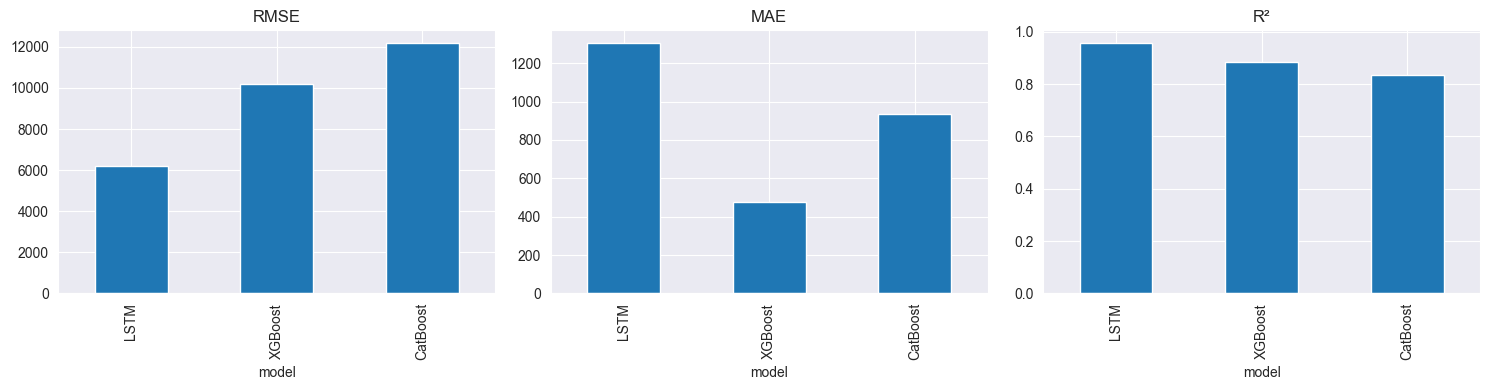

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


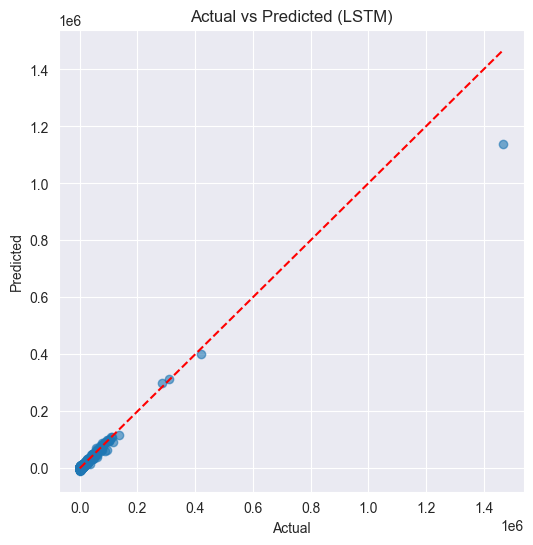

In [378]:
# ===== Section: Save Results + Plot =====

# สร้าง dictionary ของ best_models (สมมติว่า train เสร็จแล้ว)
best_models = {
    "LSTM": lstm_model,
    "XGBoost": best_xgb,    # ตัวอย่างของ XGBRegressor ที่ train เสร็จแล้ว
    "CatBoost": cat_model   # ตัวอย่างของ CatBoostRegressor ที่ train เสร็จแล้ว
}

# Save results
res_df.to_csv("model_comparison.csv", index=False)

# Plot metrics
fig, ax = plt.subplots(1,3, figsize=(15,4))
res_df.plot(kind='bar', x='model', y='rmse', ax=ax[0], legend=False); ax[0].set_title('RMSE')
res_df.plot(kind='bar', x='model', y='mae', ax=ax[1], legend=False); ax[1].set_title('MAE')
res_df.plot(kind='bar', x='model', y='r2', ax=ax[2], legend=False); ax[2].set_title('R²')
plt.tight_layout()
plt.show()

# เลือกโมเดลที่ดีที่สุดจาก R² สูงสุด
best_row = res_df.sort_values(by="r2", ascending=False).iloc[0]
best_name = best_row['model']
best_model = best_models[best_name]

# สำหรับ LSTM ต้อง reshape และ inverse scale
if best_name == "LSTM":
    X_test_lstm = scaler_X.transform(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_pred_scaled = best_model.predict(X_test_lstm)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
else:
    y_pred = best_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted ({best_name})')
plt.show()

Baseline MSE: 38324567.16

=== 🏆 Top 10 LSTM Feature Importance (Permutation) 🏆 ===
| Feature                                    |   Importance (MSE Difference) |
|:-------------------------------------------|------------------------------:|
| ปริมาณ                                      |                   1.14938e+09 |
| ชนิดสัตว์น้ำ_ปลาเป็ด                            |                   5.27894e+08 |
| ชนิดสัตว์น้ำ_หมึกกล้วย                           |                   3.18634e+08 |
| ประเภทการทำการประมง_label                  |                   1.12148e+08 |
| ขนาดเรือ_น้อยกว่า 10 ตันกรอส                   |                   1.02122e+08 |
| ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส |                   5.7625e+07  |
| ชนิดสัตว์น้ำ_ปลากะตัก                           |                   2.77059e+07 |
| เดือน_encoded                               |                   1.18328e+07 |
| เครื่องมือ_เครื่องมืออื่นๆ                         |                   1.02248e+07 |
| เครื่อ

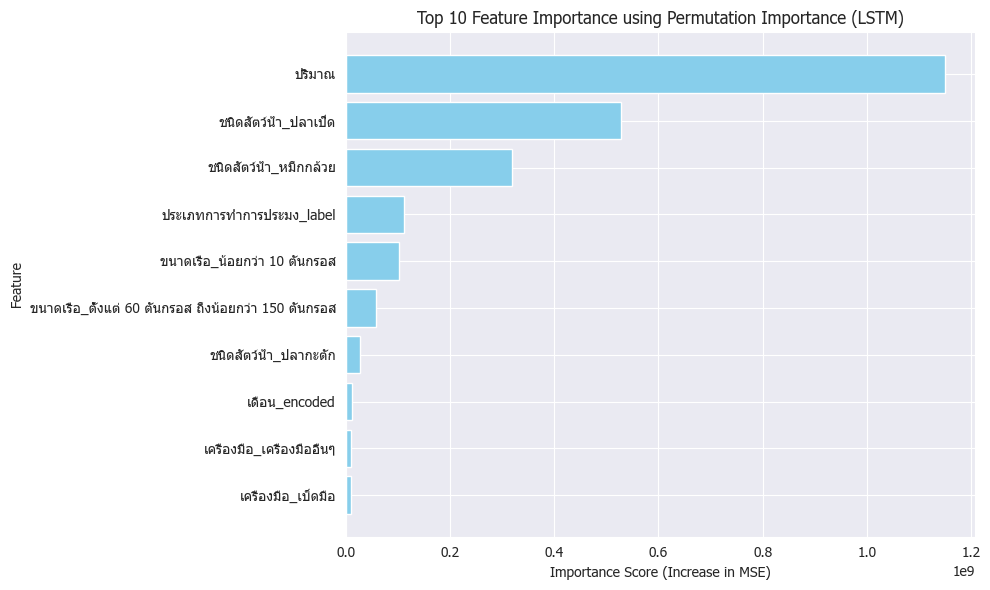

In [400]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import joblib
import os
import matplotlib.pyplot as plt

# --- 1. เตรียมข้อมูลพื้นฐาน (จำเป็นต่อการคำนวณ PFI) ---
try:
    df = pd.read_csv("afterScaler1.csv")
except FileNotFoundError:
    print("Error: ไม่พบไฟล์ 'afterScaler1.csv'. โปรดตรวจสอบไฟล์.")
    exit()

# แยก Features และ Label
X = df.drop("มูลค่า", axis=1)
y = df["มูลค่า"]
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# โหลด Scaler และ Model (พร้อมแก้ไขข้อผิดพลาด)
try:
    scaler_X = joblib.load("scaler_X.pkl")
    scaler_y = joblib.load("scaler_y.pkl")

    # *** ส่วนที่แก้ไข ***
    # แก้: โหลดโมเดลโดยไม่คอมไพล์ (compile=False) เพื่อหลีกเลี่ยง ValueError
    lstm_model = load_model("lstm_model.h5", compile=False)

    # คอมไพล์โมเดลใหม่ด้วย Loss Function เดิม
    lstm_model.compile(optimizer='adam', loss='mse')
    # *******************

except FileNotFoundError:
    print("Error: ไม่พบไฟล์ 'scaler_X.pkl', 'scaler_y.pkl', หรือ 'lstm_model.h5'. โปรดตรวจสอบว่าได้รันขั้นตอน Training ก่อนหน้านี้แล้ว")
    exit()
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการโหลดโมเดล: {e}")
    exit()

# เตรียมข้อมูล X_test ในรูปแบบ 3D และ y_test ที่เป็นค่าจริง
X_test_scaled = scaler_X.transform(X_test)
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test_scaled) # y_test_true

# --- 2. ฟังก์ชัน Permutation Feature Importance (PFI) ---
def calculate_permutation_importance_lstm(model, X_test_lstm, y_test_true, scaler_y, feature_names):
    """คำนวณ Permutation Feature Importance (PFI) สำหรับโมเดล LSTM"""

    # 1. คำนวณ Baseline Metric (MSE)
    y_pred_scaled = model.predict(X_test_lstm, verbose=0)
    y_pred_true = scaler_y.inverse_transform(y_pred_scaled)
    baseline_mse = mean_squared_error(y_test_true, y_pred_true)

    print(f"Baseline MSE: {baseline_mse:.2f}")

    importance_scores = {}

    # 2. ทำซ้ำสำหรับแต่ละฟีเจอร์
    for i, feature in enumerate(feature_names):
        X_test_permuted = X_test_lstm.copy()

        # สุ่มสลับ (Shuffle) ค่าของฟีเจอร์ที่ i ใน Time step ที่ 0
        feature_column = X_test_permuted[:, 0, i]
        np.random.shuffle(feature_column)
        X_test_permuted[:, 0, i] = feature_column

        # 3. คำนวณ Metric หลังการสลับ
        y_pred_permuted_scaled = model.predict(X_test_permuted, verbose=0)
        y_pred_permuted_true = scaler_y.inverse_transform(y_pred_permuted_scaled)
        permuted_mse = mean_squared_error(y_test_true, y_pred_permuted_true)

        # 4. คำนวณ Importance (ความแตกต่างจาก Baseline)
        importance_scores[feature] = permuted_mse - baseline_mse

    # 5. จัดอันดับ
    fi_df = pd.DataFrame(
        list(importance_scores.items()),
        columns=['Feature', 'Importance (MSE Difference)']
    ).sort_values(
        'Importance (MSE Difference)',
        ascending=False
    )

    return fi_df

# --- 3. รันและแสดงผลลัพธ์ Top 10 ---
feature_importance_lstm_df = calculate_permutation_importance_lstm(
    lstm_model,
    X_test_lstm,
    y_test_inv,
    scaler_y,
    feature_names
)

print("\n" + "="*50)
print("=== 🏆 Top 10 LSTM Feature Importance (Permutation) 🏆 ===")
print("="*50)
print(feature_importance_lstm_df.head(10).to_markdown(index=False))

# Plot Top 10
plt.figure(figsize=(10, 6))
top_10 = feature_importance_lstm_df.head(10)
plt.barh(top_10['Feature'], top_10['Importance (MSE Difference)'], color='skyblue')
plt.xlabel('Importance Score (Increase in MSE)')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance using Permutation Importance (LSTM)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()